<a 
href="https://colab.research.google.com/github/wingated/cs474_labs_f2019/blob/master/DL_Lab6.ipynb"
  target="_parent">
  <img
    src="https://colab.research.google.com/assets/colab-badge.svg"
    alt="Open In Colab"/>
</a>

# Lab 6: Sequence-to-sequence models

### Description:
For this lab, you will code up the [char-rnn model of Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). This is a recurrent neural network that is trained probabilistically on sequences of characters, and that can then be used to sample new sequences that are like the original.

This lab will help you develop several new skills, as well as understand some best practices needed for building large models. In addition, we'll be able to create networks that generate neat text!

### Deliverable:
- Fill in the code for the RNN (using PyTorch's built-in GRU).
- Fill in the training loop
- Fill in the evaluation loop. In this loop, rather than using a validation set, you will sample text from the RNN.
- Implement your own GRU cell.
- Train your RNN on a new domain of text (Star Wars, political speeches, etc. - have fun!)

### Grading Standards:
- 20% Implementation the RNN
- 20% Implementation training loop
- 20% Implementation of evaluation loop
- 20% Implementation of your own GRU cell
- 20% Training of your RNN on a domain of your choice

### Tips:
- Read through all the helper functions, run them, and make sure you understand what they are doing
- At each stage, ask yourself: What should the dimensions of this tensor be? Should its data type be float or int? (int is called `long` in PyTorch)
- Don't apply a softmax inside the RNN if you are using an nn.CrossEntropyLoss (this module already applies a softmax to its input).

### Example Output:
An example of my final samples are shown below (more detail in the
final section of this writeup), after 150 passes through the data.
Please generate about 15 samples for each dataset.

<code>
And ifte thin forgision forward thene over up to a fear not your
And freitions, which is great God. Behold these are the loss sub
And ache with the Lord hath bloes, which was done to the holy Gr
And appeicis arm vinimonahites strong in name, to doth piseling 
And miniquithers these words, he commanded order not; neither sa
And min for many would happine even to the earth, to said unto m
And mie first be traditions? Behold, you, because it was a sound
And from tike ended the Lamanites had administered, and I say bi
</code>


---

## Part 0: Readings, data loading, and high level training

---

There is a tutorial here that will help build out scaffolding code, and get an understanding of using sequences in pytorch.

* Read the following

> * [Pytorch sequence-to-sequence tutorial](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html) (You will be implementing the decoder, not the encoder, as we are not doing sequence-to-sequence translation.)
* [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)


NOTES:

[This](https://www.youtube.com/watch?v=kXQu2Q__3Tw) ta review was super helpful in understanding the lab.



In [ ]:
! wget -O ./text_files.tar.gz 'https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz' 
! tar -xzf text_files.tar.gz
! pip install unidecode
! pip install torch

import unidecode
import string
import random
import re
 
import pdb
 
all_characters = string.printable
n_characters = len(all_characters)
file = unidecode.unidecode(open('./text_files/lotr.txt').read())
file_len = len(file)
print('file_len =', file_len)

--2021-10-15 10:34:45--  https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz
Resolving piazza.com (piazza.com)... 3.221.194.245, 52.44.149.188, 52.54.75.23, ...
Connecting to piazza.com (piazza.com)|3.221.194.245|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-uploads.piazza.com/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz [following]
--2021-10-15 10:34:46--  https://cdn-uploads.piazza.com/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz
Resolving cdn-uploads.piazza.com (cdn-uploads.piazza.com)... 13.249.200.14, 13.249.200.70, 13.249.200.16, ...
Connecting to cdn-uploads.piazza.com (cdn-uploads.piazza.com)|13.249.200.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1533290 (1.5M) [application/x-gzip]
Saving to: ‘./text_files.tar.gz’

./text_files.tar.gz 100%[===================>]   1.46M  --.-KB/s  

In [ ]:
chunk_len = 200
 
def random_chunk():
  start_index = random.randint(0, file_len - chunk_len)
  end_index = start_index + chunk_len + 1
  return file[start_index:end_index]
  
print(random_chunk())

still stung by the scorn and suspicion in that cold voice. 

'Little service, no doubt, will so great a lord of Men think to find in a 
hobbit, a halfling from the northern Shire; yet such as it is, I 


In [ ]:
import torch
# Turn string into list of longs
def char_tensor(string):
  tensor = torch.zeros(len(string)).long()
  for c in range(len(string)):
      tensor[c] = all_characters.index(string[c])
  return tensor

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


---

## Part 4: Creating your own GRU cell 

**(Come back to this later - its defined here so that the GRU will be defined before it is used)**

---

The cell that you used in Part 1 was a pre-defined Pytorch layer. Now, write your own GRU class using the same parameters as the built-in Pytorch class does.

Please do not look at the documentation's code for the GRU cell definition. The answer is right there in the code, and in theory, you could just cut-and-paste it. This bit is on your honor!

**TODO:**
* Create a custom GRU cell

**DONE:**



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#this module is one of the little GRU squares on the diagram.
class GRUCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(GRUCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.sig = nn.Sigmoid()
        self.tanh = nn.Tanh()

        self.wr = nn.Linear(input_size+hidden_size, hidden_size)
        self.wz = nn.Linear(input_size+hidden_size, hidden_size)
        self.wn = nn.Linear(input_size+hidden_size, hidden_size)

    def forward(self,x_input, prev_hidden):
        # Each layer does the following:
        #NOTE: Wx + b is the form of a linear layer.
        # r_t = sigmoid(concat(W_ir*x_t + b_ir, W_hr*h_(t-1) + b_hr))
        # stack everything into one operation:
        # r_t ===> concat(W_ir, W_hr) @ concat(x_t, h_(t-1)) + concat(b_ir, b_hr)
        # (1,1,input_size) concat with (1,1,hidden_size)
        r_t = self.sig(self.wr(torch.cat((x_input, prev_hidden), dim=2)))

        # z_t = sigmoid(concat(W_iz*x_t + b_iz, W_hz*h_(t-1) + b_hz))
        z_t = self.sig(self.wz(torch.cat((x_input, prev_hidden), dim=2)))

        # n_t = tanh(concat(W_in*x_t + b_in, r_t**(W_hn*h_(t-1) + b_hn)))
        n_t = self.tanh(self.wn(torch.cat((torch.mul(r_t, prev_hidden), x_input), dim=2)))

        # h_(t) = (1 - z_t)**n_t + z_t**h_(t-1)
        h_t = torch.mul(1-z_t, n_t) + torch.mul(z_t, prev_hidden)
        # Where ** is hadamard product (not matrix multiplication, but elementwise multiplication)

        #return two things because they are each going to different places.
        return h_t, h_t

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(GRU, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # cannot use an array here. Must use torch's modulelist to register all of the parameters in each layer with the optimizer for backprop
        self.gru_cells = nn.ModuleList([])
        for layer in range(self.num_layers):
            gru_input_size = self.input_size if layer == 0 else hidden_size
            self.gru_cells.append(GRUCell(gru_input_size, hidden_size))
  
    def forward(self, inputs, hidden):
        #first GRU cell pass through
        outputs, hiddens = self.gru_cells[0](inputs, hidden[0:1])
        #for the rest of the layers
        for layer in range(1, self.num_layers):
            outputs, hidden_layer = self.gru_cells[layer](outputs, hidden[layer:layer+1])
            #concat with hiddens to keep a record to return at the end
            hiddens = torch.cat((hiddens, hidden_layer), dim=0)
    
        return outputs, hiddens #(1,1,200), (3,1,200)
  


---

##  Part 1: Building a sequence to sequence model

---

Great! We have the data in a useable form. We can switch out which text file we are reading from, and trying to simulate.

We now want to build out an RNN model, in this section, we will use all built in Pytorch pieces when building our RNN class.


**TODO:**
* Create an RNN class that extends from nn.Module.

**DONE:**



In [ ]:

import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size #vocabulary size
        self.hidden_size = hidden_size #embedding dimension
        self.output_size = output_size #
        self.n_layers = n_layers
        
        # more stuff here...
        #pytorch embedding is a way to encode a word as vector and has shape (vocab size x embedding dim)
        self.embedding = nn.Embedding(self.input_size, self.hidden_size)

        self.relu = nn.ReLU()

        #GRU expects (batch x input size x hidden size) and returns (batch x input_size x hidden_size)
        self.gru = GRU(input_size=self.hidden_size,
                        hidden_size=self.hidden_size,
                        num_layers=self.n_layers)

        self.to_output_shape = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input_char, hidden):
        # by reviewing the documentation, construct a forward function that properly uses the output
        # of the GRU
        embedded = self.embedding(input_char).view(1,1,-1)
        output, hidden = self.gru(embedded, hidden)
        out_decoded = self.relu(self.to_output_shape(output))
        return out_decoded, hidden

    def init_hidden(self):
        return torch.zeros(self.n_layers, 1, self.hidden_size)


In [ ]:
def random_training_set():    
  chunk = random_chunk()
  inp = char_tensor(chunk[:-1])
  target = char_tensor(chunk[1:])
  return inp, target

---

## Part 2: Sample text and Training information

---

We now want to be able to train our network, and sample text after training.

This function outlines how training a sequence style network goes. 

**TODO:**
* Fill in the pieces.

**DONE:**




In [ ]:
# NOTE: decoder_optimizer, decoder, and criterion will be defined below as global variables
def train(input_tensor, target_tensor):
    # initialize hidden layers, set up gradient and loss
    decoder_optimizer.zero_grad()
    hidden = decoder.init_hidden()
    loss = 0

    # print("\nINPUT:{}".format(input_tensor))
    # print("TARGET:{}".format(target_tensor))

    for c in range(chunk_len):
        # print("\nCHAR_IN: {}".format(input_tensor[c]))
        # print("CHAR_TARGET: {}".format(target_tensor[c]))
        #make a prediction given char_in
        #PROBLEM WAS HERE. I wasn't overwriting hidden in each loop, so I was just using the initial hidden each time. 
        y_hat, hidden = decoder(input_tensor[c], hidden)
        #reshapce so CEL is happy
        #add up loss between predicted distribution and actual one
        loss += criterion(y_hat.squeeze(0), target_tensor[c].unsqueeze(0))

    #optimize
    loss.backward()
    decoder_optimizer.step()

    #return average score
    loss_score = loss.item()/len(input_tensor)
    return loss_score


---

## Part 3: Sample text and Training information

---

You can at this time, if you choose, also write out your train loop boilerplate that samples random sequences and trains your RNN. This will be helpful to have working before writing your own GRU class.

If you are finished training, or during training, and you want to sample from the network you may consider using the following function. If your RNN model is instantiated as `decoder`then this will probabilistically sample a sequence of length `predict_len`

**TODO:**
* Fill out the evaluate function to generate text frome a primed string

**DONE:**



In [ ]:
def sample_outputs(output, temperature):
    """Takes in a vector of unnormalized probability weights and samples a character from the distribution"""
    # As temperature approaches 0, this sampling function becomes argmax (no randomness)
    # As temperature approaches infinity, this sampling function becomes a purely random choice
    #NOTE: choose highest probability with the highest probability, but not always.
    # sometimes "the" or sometimes "that"
    return torch.multinomial(torch.exp(output / temperature), 1)

def evaluate(prime_str='A', predict_len=200, temperature=0.8):
    with torch.no_grad():
        # initialize hidden variable, initialize other useful variables
        hidden = decoder.init_hidden()
        prime_chars = char_tensor(prime_str)

        #go through the whole primer string 
        # (minus 1 b/c the last char of primer is first input to prediction)
        for c in range(len(prime_chars)-1):
            #pass hiddens through
            _, hidden = decoder(prime_chars[c], hidden)

        #input to prediction part of string is the last char of the primer string
        eval_char = prime_chars[-1]

        for p in range(predict_len):
            next_char_prob, hidden = decoder(eval_char, hidden) #next_char_prob is 1x1x100
            sampled_index = sample_outputs(next_char_prob.view(-1), temperature=temperature) #just pass in last dim
            #get actual char from its index
            char_choice = all_characters[sampled_index]
            #update to be the next char in the sequence for the next loop
            eval_char = char_tensor(char_choice)
            #add predicted char to end of prediction string
            prime_str += char_choice

    return prime_str

---

## Part 4: (Create a GRU cell, requirements above)

---



---

## Part 5: Run it and generate some text!

---


**TODO:** 
* Create some cool output

**DONE:**




Assuming everything has gone well, you should be able to run the main function in the scaffold code, using either your custom GRU cell or the built in layer, and see output something like this. I trained on the “lotr.txt” dataset, using chunk_length=200, hidden_size=100 for 2000 epochs. These are the results, along with the prime string:

---

 G:
 
 Gandalf was decrond. 
'All have lord you. Forward the road at least walk this is stuff, and 
went to the long grey housel-winding and kindled side was a sleep pleasuring, I do long 
row hrough. In  

 lo:
 
 lost death it. 
'The last of the gatherings and take you,' said Aragorn, shining out of the Gate. 
'Yes, as you there were remembaused to seen their pass, when? What 
said here, such seven an the sear 

 lo:
 
 low, and frod to keepn 
Came of their most. But here priced doubtless to an Sam up is 
masters; he left hor as they are looked. And he could now the long to stout in the right fro horseless of 
the like 

 I:
 
 I had been the 
in his eyes with the perushed to lest, if then only the ring and the legended 
of the less of the long they which as the 
enders of Orcovered and smood, and the p 

 I:
 
 I they were not the lord of the hoomes. 
Home already well from the Elves. And he sat strength, and we 
housed out of the good of the days to the mountains from his perith. 

'Yess! Where though as if  

 Th:
 
 There yarden 
you would guard the hoor might. Far and then may was 
croties, too began to see the drumbred many line 
and was then hoard walk and they heart, and the chair of the 
Ents of way, might was 

 G:
 
 Gandalf 
been lat of less the round of the stump; both and seemed to the trees and perished they 
lay are speered the less; and the wind the steep and have to she 
precious. There was in the oonly went 

 wh:
 
 which went out of the door. 
Hull the King and of the The days of his brodo 
stumbler of the windard was a thing there, then it been shining langing 
to him poor land. They hands; though they seemed ou 

 ra:
 
 rather,' have all the least deather 
down of the truven beginning to the house of sunk. 
'Nark shorts of the Eyes of the Gate your great nothing as Eret. 
'I wander trust horn, and there were not, it  

 I:
 
 I can have no mind 
together! Where don't may had one may little blung 
terrible to tales. And turn and Gandalf shall be not to as only the Cattring 
not stopped great the out them forms. On they she lo 

---


In [ ]:
import time
n_epochs = 5000
print_every = 500
plot_every = 10
hidden_size = 100
n_layers = 3
lr = 0.0007
 
decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
 
start = time.time()
all_losses = []
loss_avg = 0

In [ ]:
from tqdm import tqdm
for epoch in tqdm(range(1, n_epochs + 1)):
    loss_ = train(*random_training_set())    
    loss_avg += loss_

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss_))
        print(evaluate('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 10%|████                                    | 501/5000 [01:12<10:59,  6.83it/s]

[72.52430748939514 (500 10%) 2.7162]
Why as, Uoll de18y day are, ?#erNrer ~illmald efer, si$he 
moEPer 
a2eriz) sull sous |ordiwhigursy 
r 



 20%|███████▊                               | 1001/5000 [02:23<10:01,  6.65it/s]

[143.84948182106018 (1000 20%) 2.5733]
Whert was 

Furdeld. 







fet dart. At the goloud the 9oud the 
ap, 
of as dumry is 

vou_thy walga 



 30%|███████████▋                           | 1501/5000 [03:35<09:06,  6.40it/s]

[216.25750255584717 (1500 30%) 2.1070]
Whe, at 
his }old adowto feress. Affer all the mase seemar *idow. 


me sat the more the said, ~wo the 



 40%|███████████████▌                       | 2001/5000 [04:48<07:26,  6.72it/s]

[288.57297229766846 (2000 40%) 1.9757]
Whing on them. 




Whould in they han. |our hill aly 
agold do so ever is moles. qean have 
hound't s 



 50%|███████████████████▌                   | 2501/5000 [06:01<06:04,  6.85it/s]

[361.609512090683 (2500 50%) 1.6634]
Whil then't,' wele =eary white and alroud. 

deast of they wold new great he nesy so wellodid and they 



 60%|███████████████████████▍               | 3001/5000 [07:13<04:58,  6.70it/s]

[434.41780614852905 (3000 60%) 1.7143]
Whaters now for the grepery, and the some of then he gath. 

I was shore a while be if to for to seep, 



 70%|███████████████████████████▎           | 3501/5000 [08:26<03:38,  6.87it/s]

[506.6041090488434 (3500 70%) 2.0296]
Where it have told sime one you 

Right 
their tade and remain, and all had now 8rosen mind an like al 



 80%|███████████████████████████████▏       | 4001/5000 [09:35<02:28,  6.75it/s]

[576.2993803024292 (4000 80%) 1.5003]
What forgething lands, and we glopes alrost and line most away 
the deep to still. Frodo whinly old mo 



 90%|███████████████████████████████████    | 4501/5000 [10:49<01:19,  6.32it/s]

[649.5312356948853 (4500 90%) 1.6279]
Where that I what be some the was stood 
for and path some forther, and they pattle it, but he has bee 



100%|███████████████████████████████████████| 5000/5000 [12:01<00:00,  6.93it/s]

[722.2638111114502 (5000 100%) 1.7903]
Whiling 
they said its and breaving all the shadows of fives of the 
his there. He to down 
white stri 



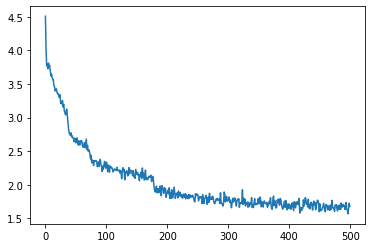

In [ ]:
import matplotlib.pyplot as plt

plt.plot(all_losses)

In [ ]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
#   all_characters.index(string[c])
  print(evaluate(start_strings[start], 200), '\n')

 ca
 can younking 
ongue that ;on the darged hear the green been the the right that the how 
that then he heard not litten on sleater. More do not was so there is nom in a fout in the great great shall sudde 

 G
 Gandalf. If might then he was 
and through a fagen 
both. Srow son the left to 
dying you was leed heart. 

'I long it 
not 
not is 
rain than a wift up as he hand on his aras, and seen him, and so am  

 ca
 came 
treak hess. 

''And so hoYe hope the straBped aorobs. >em no lough 
the soft hyward of the Kened to the near. 'It was now yell not straught all ever one they 
with he longer. 'I tied 
near. 'I wor 

 I 
 I may. 'Now i roof a brand step string, 
and not whtere him to the world the tenty of I many had said out 
some is }lands wordly the weathing of the 'tale and heard, and soog a stringing with 
they had  

 lo
 long of a streamed the 
put. He last for the hose a 
passed into a shear, bag on with the last, and has I stirst and first that down the 
dark stone. 

''-Sa

---

## Part 6: Generate output on a different dataset

---

**TODO:**

* Choose a textual dataset. Here are some [text datasets](https://www.kaggle.com/datasets?tags=14104-text+data%2C13205-text+mining) from Kaggle 

* Generate some decent looking results and evaluate your model's performance (say what it did well / not so well)

**DONE:**



I downloaded state of the union addresses of all presidents. 


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/jyronw/us-state-of-the-union-addresses-1790-2019")
#{"username":"curtiscjohnson","key":"a1464c2d3670441fa3739c4d40484c57"}

Skipping, found downloaded files in "./us-state-of-the-union-addresses-1790-2019" (use force=True to force download)


In [ ]:
import pandas as pd

data = pd.read_csv("./us-state-of-the-union-addresses-1790-2019/state_ofthe_union_texts.csv")

data


,President,Year,Title,Text
0,George Washington,1790,First State of the Union Address,['I embrace with great satisfaction the opport...
1,George Washington,1790,Second State of the Union Address,['Fellow-Citizens of the Senate and the House ...
2,George Washington,1791,Third State of the Union Address,['Fellow-Citizens of the Senate and the House ...
3,George Washington,1792,Fourth State of the Union Address,['Fellow-Citizens of the Senate and of the Hou...
4,George Washington,1793,Fifth State of the Union Address,['Fellow Citizens of the Senate and of the Hou...
...,...,...,...,...
214,Barack Obama,2015,Barack Obama's Seventh State of the Union Address,"['Mr. Speaker, Mr. Vice President, Members of ..."
215,Barack Obama,2016,Barack Obama's Eighth State of the Union Address,"['Mr. Speaker, Mr. Vice President, Members of ..."
216,Donald Trump,2017,Donald Trump's First State of the Union Address,"['Mr. Speaker, Mr. Vice President, Members of ..."
217,Donald Trump,2018,Donald Trump's Second State of the Union Address,"['Mr. Speaker, Mr. Vice President, Members of ..."


In [ ]:
type(data["Text"])

pandas.core.series.Series

In [ ]:
text = ""
for index, string in data['Text'].items():
    text += string
#not gonna worry about special characters like [] or \ for lines. 

In [ ]:
len(text)

10622271

In [ ]:
with open("SOTU.txt", 'w') as f:
    f.write(text)
    f.close()

file = unidecode.unidecode(open('SOTU.txt').read())
file_len = len(file)
print('file_len =', file_len)

file_len = 10624563


In [ ]:
n_epochs = 5000
print_every = 500
plot_every = 10
hidden_size = 100
n_layers = 3
lr = 0.0007
 
decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
 
start = time.time()
all_losses = []
loss_avg = 0

In [ ]:
for epoch in tqdm(range(1, n_epochs + 1)):
    loss_ = train(*random_training_set())    
    loss_avg += loss_

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss_))
        print(evaluate('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 10%|████                                    | 501/5000 [01:06<10:20,  7.25it/s]

[83.40230989456177 (500 10%) 2.9223]
Whp hn opodoiNnelJ eP, on ceoSnif to ich Gosotabn ononoseefian nhr sinisas] are o d cs oat noof t seit 



 20%|███████▊                               | 1001/5000 [02:12<08:50,  7.54it/s]

[149.8746247291565 (1000 20%) 2.1523]
Whe surdin me the neite of Reuld <ist at prreer of the nand proats and of the alt date epead of the I  



 30%|███████████▋                           | 1501/5000 [03:17<07:44,  7.54it/s]

[214.3344020843506 (1500 30%) 1.8826]
Wher sact must and ale eneteet of the clas a part all connersional creats of the port the re~uers copc 



 40%|███████████████▌                       | 2001/5000 [04:20<06:47,  7.36it/s]

[278.12730169296265 (2000 40%) 1.9512]
WhinF the present of that protess to procities the pudded prolt fhance dispensed to be prifitaratus th 



 50%|███████████████████▌                   | 2501/5000 [05:25<05:34,  7.48it/s]

[343.12504863739014 (2500 50%) 1.8237]
Wher intustiment of the +rantural so to not of the mor of the shortene is that the convent made in a f 



 60%|███████████████████████▍               | 3001/5000 [06:31<04:41,  7.11it/s]

[408.56090474128723 (3000 60%) 1.6576]
When act a mameany are chibiliminause, to keriary interest shall depart in should ,eceA1t year a pot  



 70%|███████████████████████████▎           | 3501/5000 [07:35<03:23,  7.38it/s]

[472.77331042289734 (3500 70%) 1.6831]
ekuld of all 



 80%|███████████████████████████████▏       | 4001/5000 [08:41<02:16,  7.34it/s]

[538.6062543392181 (4000 80%) 1.8230]
Whoutal act to presult of the last is in those(, and from the can and the ;econded to be fraitment of  



 90%|███████████████████████████████████    | 4501/5000 [09:47<01:10,  7.10it/s]

[604.3614726066589 (4500 90%) 1.6088]
Which it thereors to Deplected, and ,00, ;uch such ficitical reasult from the returnity of leat the Yu 



100%|███████████████████████████████████████| 5000/5000 [10:54<00:00,  7.64it/s]

[671.7685198783875 (5000 100%) 1.4674]
Whice the sources some and ofly men pland to prive the proposed is stilling the breaty at their expres 



In [ ]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
#   all_characters.index(string[c])
  print(evaluate(start_strings[start], 200), '\n')

 wh
 which bether but its former of the interminity interest and for they cher not herise the loOge the caused and value of Xxagy the economy of .ure resist of the fund by our elication is refendments by at 

 ra
 ray and the praged to consilies that this labor that the bost has hope breach the a aimiture.', zendor have furnectors are the enforce of the States the 6ther [+fitly and us the stear of its educy of th 

 he
 here and not enount it a vanic considerative for suple.',y Xreed in the our enacted provision and friend met to its bost has relification for thrang the last in#ur and country and commandast in such is  

 Th
 The bread of pay of the long.', "at this entired and inend in the righter proves and securing |urred housing, exill this brouse not be are some has Korethen and of our achoopication resourcensiomed that 

 lo
 local pro/urds. Its adriplic \nfor+ther }here not the property. It interests addecity to affect the country effectment in the him presentional been sates o

This is cool. The RNN picked up on important words like "United States" and "economy". It is also interesting that lots of the longer formal words that are compound words are mixed up -- like "intercation", "effectment", or "presentional". There are still some weird characters floating around and random numbers.

The RNN also picked up on punctuation decently. Capital letters generally come after periods, but not after commas or quotations. 